In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

usually, before you start plotting, you can set some settings, like style and font scale

In [11]:
sns.set(
    style='whitegrid', 
    font_scale=1.2,
)

## Similar functions for similar tasks

In [5]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


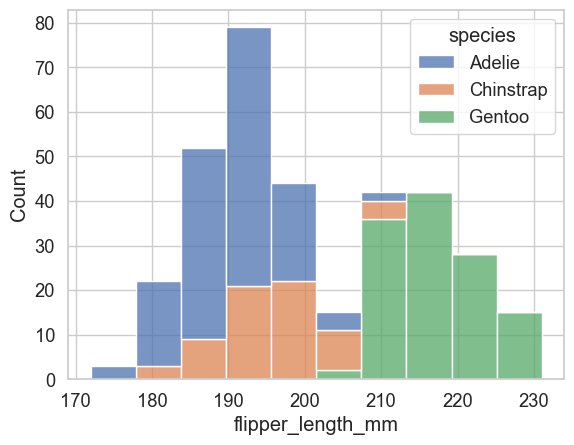

In [16]:
sns.histplot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    multiple='stack' # options -> layer, dodge, stack, fill
);

the **multiple** keyword has these options :
- layer
- dodge
- stack
- fill

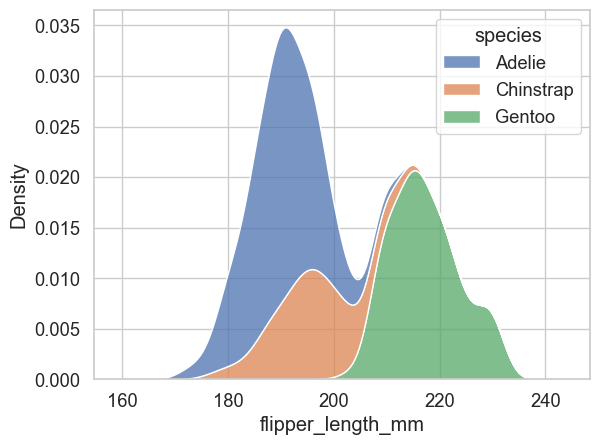

In [28]:
sns.kdeplot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    multiple='stack',
);

## figure-level VS axes-level

![figure-level](https://raw.githubusercontent.com/pytopia/ML/527740f5a2ff81b33d847b28a9f4ebc7e91bf2d9/Machine%20Learning/04.%20Data%20Visualization/images/seaborn_function_overview.png)

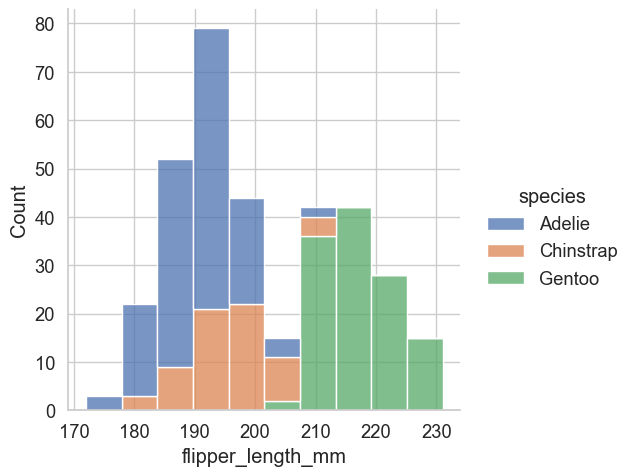

In [35]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    multiple='stack',
)

this is a figure-level plot

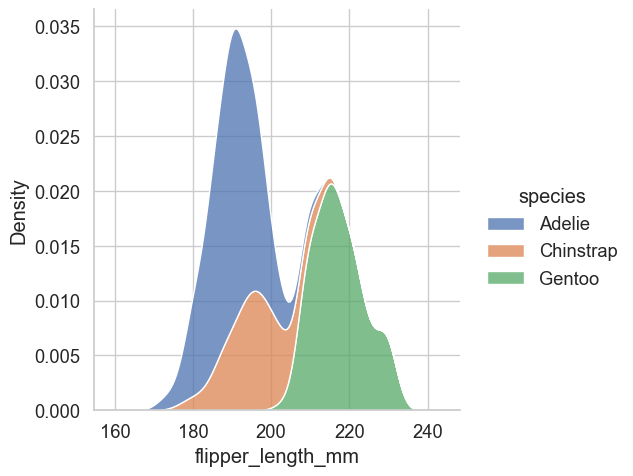

In [37]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    multiple='stack',
    kind='kde',
);

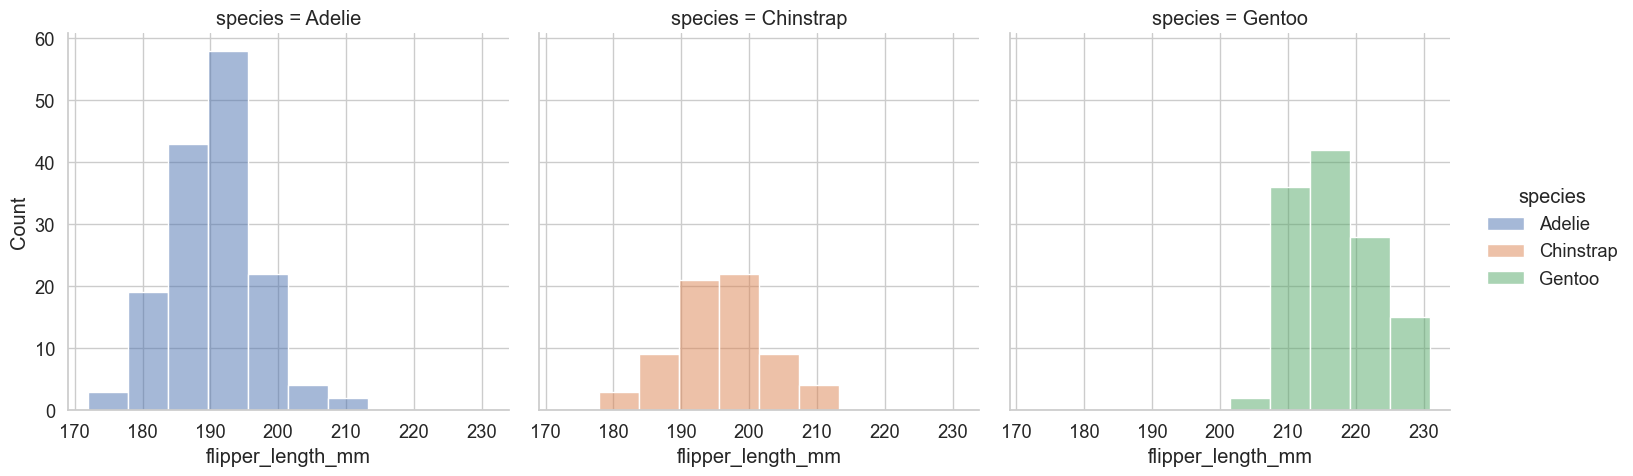

In [40]:
sns.displot(
    data=penguins,
    x='flipper_length_mm',
    hue='species',
    col='species',
);

The figure-level functions wrap their axes-level counterparts and pass the kind-specific keyword arguments (such as the bin size for a histogram) down to the underlying function. That means **they are no less flexible**, **but there is a downside: the kind-specific parameters don’t appear in the function signature or docstrings**. Some of their features might be less discoverable, and you may need to look at two different pages of the documentation before understanding how to achieve a specific goal.

### Axes-level functions make self-contained plots

The axes-level functions are written to act like drop-in replacements for matplotlib functions. While they add axis labels and legends automatically, they don’t modify anything beyond the axes that they are drawn into. That means they can be composed into arbitrarily-complex matplotlib figures with predictable results.

The axes-level functions call matplotlib.pyplot.gca() internally, which hooks into the matplotlib state-machine interface so that they draw their plots on the “currently-active” axes. But they additionally accept an ax= argument, which integrates with the object-oriented interface and lets you specify exactly where each plot should go:

<AxesSubplot:xlabel='species', ylabel='Count'>

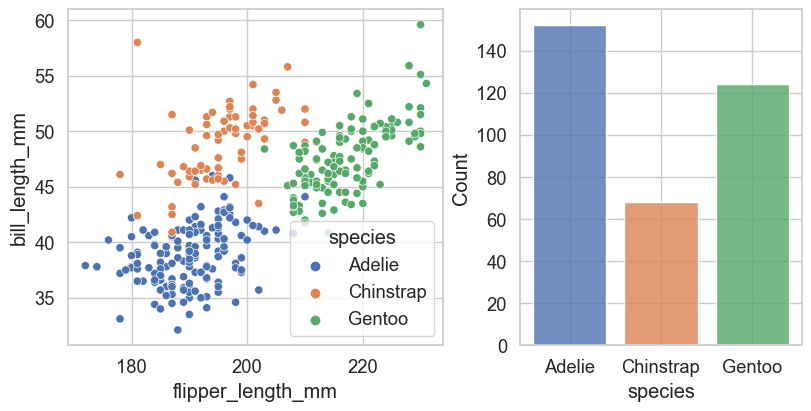

In [46]:
f, axs = plt.subplots(
    1, 2,
    figsize=(8, 4),
    gridspec_kw=dict(width_ratios=[4, 3]),
    layout='constrained',
)
sns.scatterplot(
    data=penguins,
    x="flipper_length_mm", y="bill_length_mm",
    hue="species",
    ax=axs[0]
)
sns.histplot(
    data=penguins,
    x="species",
    hue="species",
    shrink=.8,
    alpha=.8,
    legend=False,
    ax=axs[1]
)

### figure-level functions own their figure

In contrast, figure-level functions cannot (easily) be composed with other plots. By design, they “own” their own figure, including its initialization, so there’s no notion of using a figure-level function to draw a plot onto an existing axes. This constraint allows the figure-level functions to implement features such as putting the legend outside of the plot.

Nevertheless, it is possible to go beyond what the figure-level functions offer by accessing the matplotlib axes on the object that they return and adding other elements to the plot that way:

In [48]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


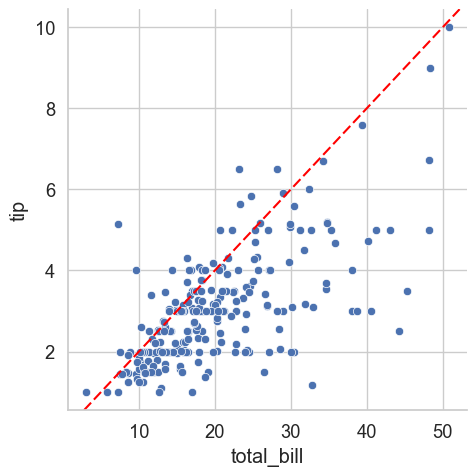

In [55]:
g = sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
)

g.ax.axline(xy1=(10, 2), slope=0.2, color='red', dashes=(5, 2)); # drawing a single line

### Customizing plots from a figure level function

The figure-level functions return a `FacetGrid` instance, which has a few methods for customizing attributes of the plot in a way that is “smart” about the subplot organization. For example, you can change the labels on the external axes using a single line of code:



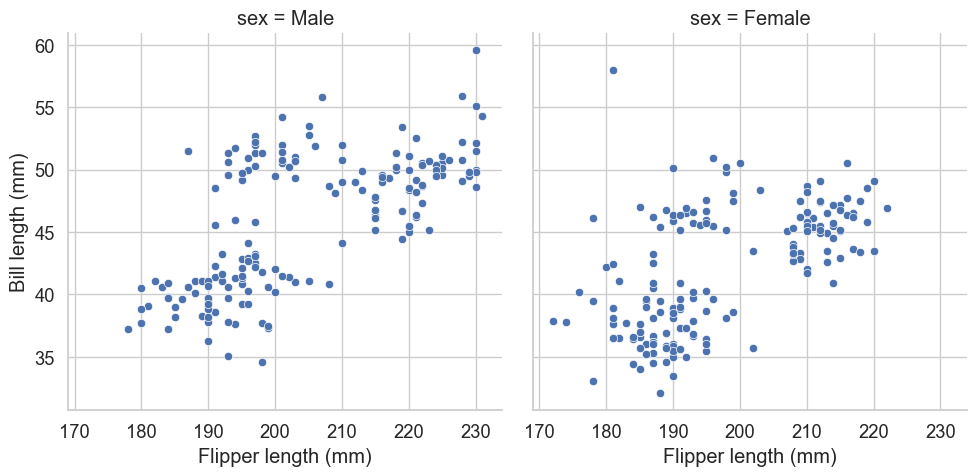

In [59]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)")

### Specifying figure sizes

To increase or decrease the size of a matplotlib plot, you set the width and height of the entire figure, either in the **global rcParams**, while setting up the plot (e.g. with the **figsize parameter of matplotlib.pyplot.subplots()**), or by calling a method on the figure object (e.g. **matplotlib.Figure.set_size_inches()**). When using an **axes-level** function in seaborn, the same rules apply: the size of the plot is determined by the size of the figure it is part of and the axes layout in that figure.

When using a **figure-level** function, there are several key differences. First, the **functions themselves have parameters to control the figure size** (although these are actually parameters of the underlying FacetGrid that manages the figure). Second, these parameters, height and aspect, parameterize the size slightly differently than the width, height parameterization in matplotlib (using the seaborn parameters, width = height * aspect). Most importantly, the parameters correspond to the size of each subplot, rather than the size of the overall figure.

To illustrate the difference between these approaches, here is the default output of matplotlib.pyplot.subplots() with one subplot:

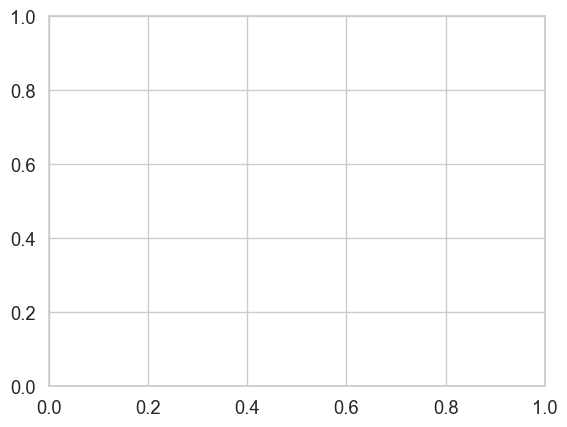

In [60]:
f, ax = plt.subplots()

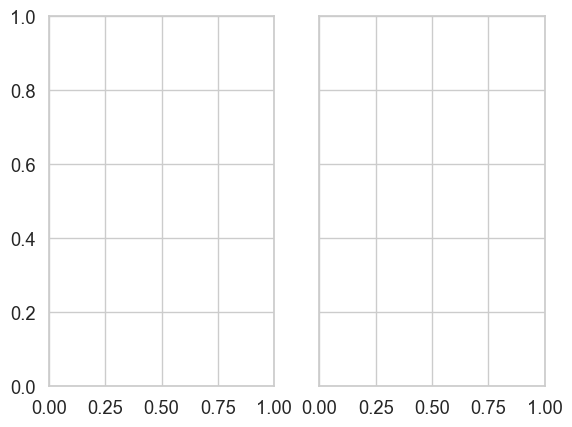

In [64]:
f, ax = plt.subplots(1, 2, sharey=True)

___
In contrast, a plot created by a figure-level function will be square. To demonstrate that, let’s set up an empty plot by using FacetGrid directly. This happens behind the scenes in functions like relplot(), displot(), or catplot():

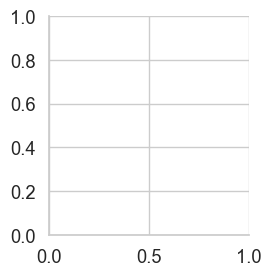

In [65]:
g = sns.FacetGrid(penguins)

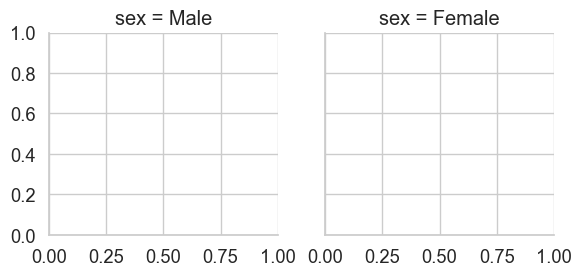

In [66]:
g = sns.FacetGrid(penguins, col='sex')

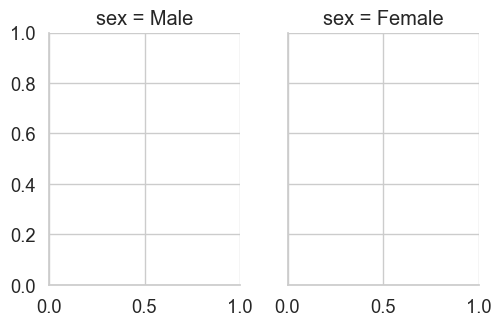

In [67]:
g = sns.FacetGrid(penguins, col='sex', height=3.5, aspect=0.75)

Here is a summary of the pros and cons that we have discussed above:

Advantages : 
make a markdown table for these info :

`Advantages`                                                    
- Easy faceting by data variables
- Legend outside of plot by default
- Easy figure-level customization
- Different figure size parameterization

`Drawbacks`
- Many parameters not in function signature
- Cannot be part of a larger matplotlib figure
- Different API from matplotlib
- Different figure size parameterization

On balance, the figure-level functions add some additional complexity that can make things more confusing for beginners, but their distinct features give them additional power. The tutorial documentation mostly uses the figure-level functions, because they produce slightly cleaner plots, and we generally recommend their use for most applications. The one situation where they are not a good choice is when you need to make a complex, standalone figure that composes multiple different plot kinds. At this point, it’s recommended to set up the figure using matplotlib directly and to fill in the individual components using axes-level functions.

### Combining multiple views on the data


Two important plotting functions in seaborn don’t fit cleanly into the classification scheme discussed above. These functions, `jointplot()` and `pairplot()`, employ multiple kinds of plots from different modules to represent multiple aspects of a dataset in a single figure. Both plots are **figure-level** functions and create figures with multiple subplots by default. But they use different objects to manage the figure: JointGrid and PairGrid, respectively.

`jointplot()` plots the **relationship** or **joint distribution** of two variables while adding marginal axes that show the univariate distribution of each one separately:

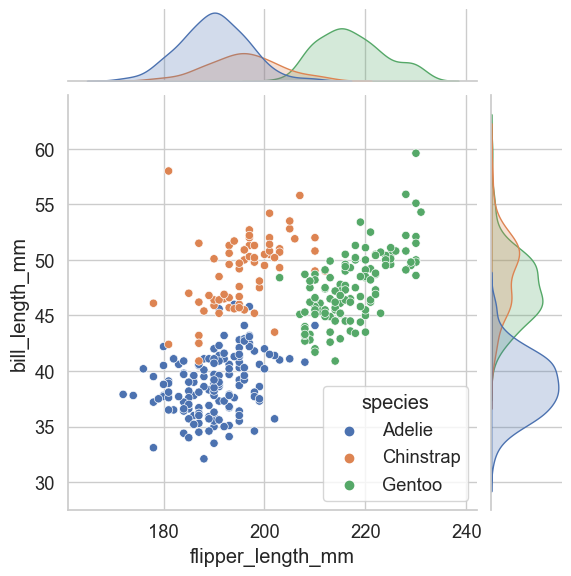

In [69]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species");

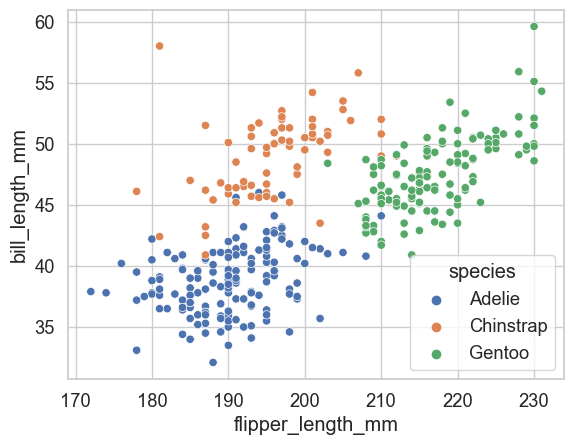

In [75]:
sns.scatterplot(
    data=penguins,
    x='flipper_length_mm',
    y='bill_length_mm',
    hue='species',
);

pairplot() is similar — it combines joint and marginal views — but rather than focusing on a single relationship, it visualizes every pairwise combination of variables simultaneously:


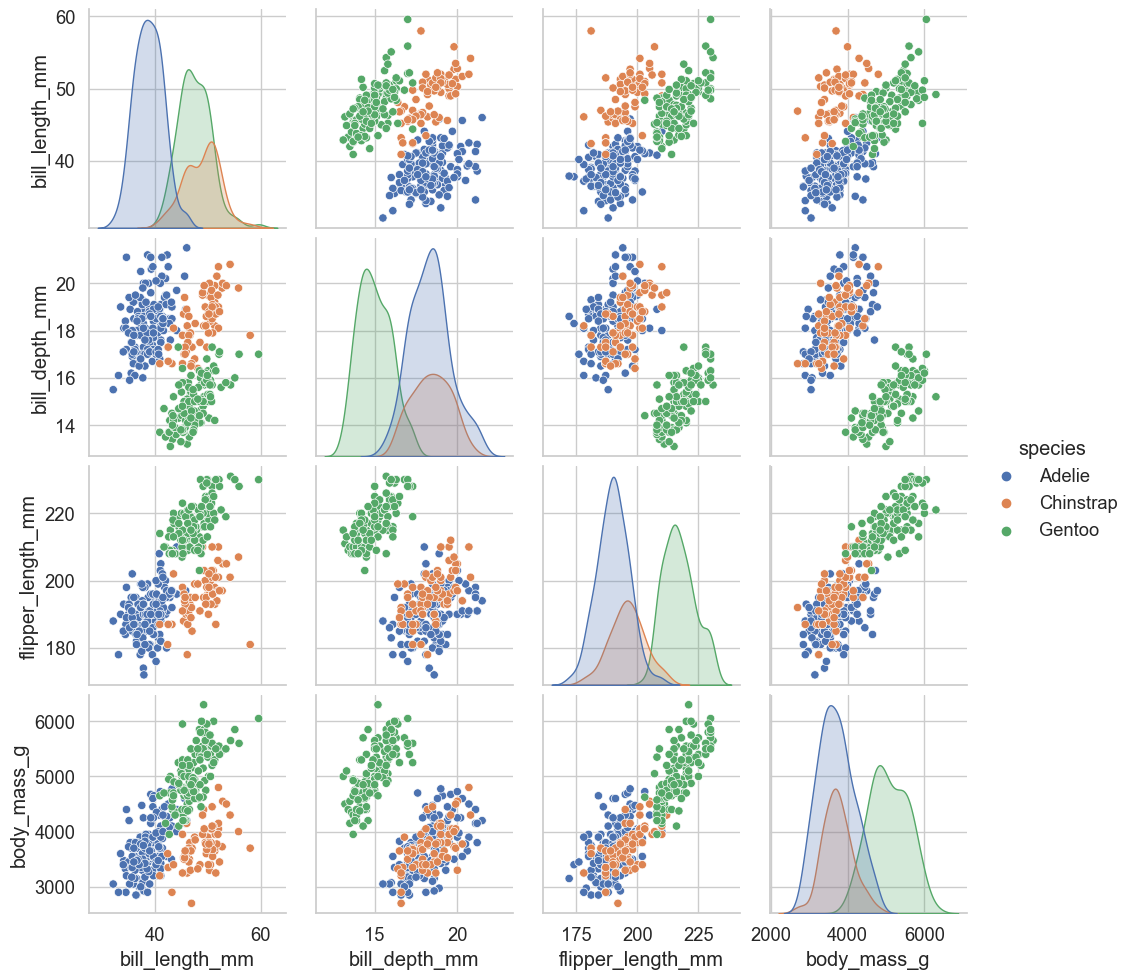

In [78]:
sns.pairplot(data=penguins, hue="species")

Behind the scenes, these functions are using axes-level functions that you have already met (scatterplot() and kdeplot()), and they also have a **kind** parameter that lets you quickly swap in a different representation:

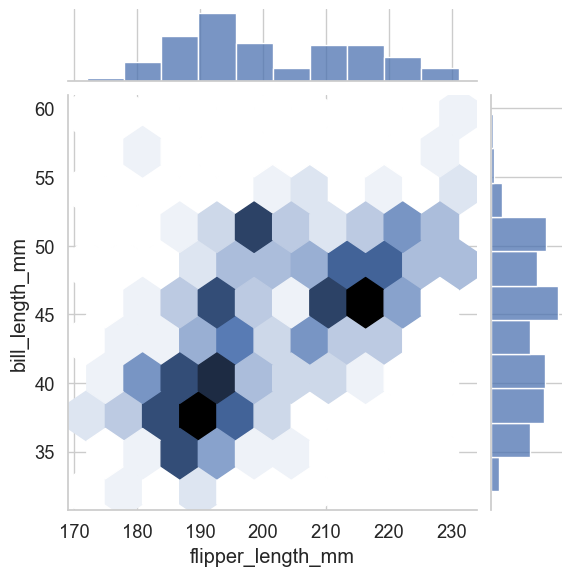

In [90]:

sns.jointplot(
    data=penguins, x="flipper_length_mm", y="bill_length_mm",
    kind="hex",  # options: "scatter", "kde", "hist", "hex", "reg", "resid"
);